#Lab Exercise 3 - Regression Analysis
- Created by: Ashwathy Ratheesan | 2348412
- Created Date: 28.02.2024
- Edited Dates: 29.02.2024



Importing Libraries
- numpy -- for numerical, array, matrices (Linear Algebra) processing
- pandas -- for loading and processing dataset
- matplotlib.pyplot - for visualization
- Seaborn - for statistical visualization
- Plotly.express -- for interactive visualization
- Scipy -- for numerical and scientific computing

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from scipy.stats import norm, shapiro
from statsmodels.graphics.gofplots import qqplot

sns.set_style('darkgrid')

In [ ]:
df = pd.read_csv("/content/fundamentals.csv")

##Displaying and describing the data

In [ ]:
df.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [ ]:
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
column_names = list(df.columns)
print(column_names)


['Unnamed: 0', 'Ticker Symbol', 'Period Ending', 'Accounts Payable', 'Accounts Receivable', "Add'l income/expense items", 'After Tax ROE', 'Capital Expenditures', 'Capital Surplus', 'Cash Ratio', 'Cash and Cash Equivalents', 'Changes in Inventories', 'Common Stocks', 'Cost of Revenue', 'Current Ratio', 'Deferred Asset Charges', 'Deferred Liability Charges', 'Depreciation', 'Earnings Before Interest and Tax', 'Earnings Before Tax', 'Effect of Exchange Rate', 'Equity Earnings/Loss Unconsolidated Subsidiary', 'Fixed Assets', 'Goodwill', 'Gross Margin', 'Gross Profit', 'Income Tax', 'Intangible Assets', 'Interest Expense', 'Inventory', 'Investments', 'Liabilities', 'Long-Term Debt', 'Long-Term Investments', 'Minority Interest', 'Misc. Stocks', 'Net Borrowings', 'Net Cash Flow', 'Net Cash Flow-Operating', 'Net Cash Flows-Financing', 'Net Cash Flows-Investing', 'Net Income', 'Net Income Adjustments', 'Net Income Applicable to Common Shareholders', 'Net Income-Cont. Operations', 'Net Receivab

# column details
- **Ticker**: A unique identifier for each company.
- **Period Ending**: The date on which the financial data was reported.
- **Accounts Payable**: The amount of money owed to suppliers for goods or services purchased on credit.
- **Accounts Receivable**: The amount of money owed to the company by its customers for goods or services sold on credit.
- **COGS**: The cost of goods sold, which includes the cost of materials, labor, and overhead used to produce the goods.
- **Gross Profit**: The difference between revenue and COGS.
- **Inventory**: The value of goods that are currently in stock.
- **Net Income**: The profit that a company makes after all expenses have been paid.
- **Property, Plant and Equipment**: The value of the company's physical assets, such as buildings, machinery, and equipment.
- **Receivables**: The amount of money owed to the company by its customers.
- **Sales, General and Admin Expenses**: The expenses incurred in the day-to-day operations of the business.
- **Total Assets**: The total value of the company's assets.
- **Total Current Assets**: The value of the company's assets that can be converted into cash within one year.
- **Total Current Liabilities**: The value of the company's liabilities that are due within one year.
- **Total Debt**: The total amount of money that the company owes to its creditors.
- **Total Equity**: The value of the company's assets minus its liabilities.
- **Total Liabilities**: The total amount of money that the company owes to its creditors and shareholders.
- **Total Revenue**: The total amount of money that the company generated from its operations.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 79 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Unnamed: 0                                           1781 non-null   int64  
 1   Ticker Symbol                                        1781 non-null   object 
 2   Period Ending                                        1781 non-null   object 
 3   Accounts Payable                                     1781 non-null   float64
 4   Accounts Receivable                                  1781 non-null   float64
 5   Add'l income/expense items                           1781 non-null   float64
 6   After Tax ROE                                        1781 non-null   float64
 7   Capital Expenditures                                 1781 non-null   float64
 8   Capital Surplus                                      1781 non-null  

In [ ]:
df.isnull().sum()

Unnamed: 0                        0
Ticker Symbol                     0
Period Ending                     0
Accounts Payable                  0
Accounts Receivable               0
                               ... 
Total Revenue                     0
Treasury Stock                    0
For Year                        173
Earnings Per Share              219
Estimated Shares Outstanding    219
Length: 79, dtype: int64

In [ ]:
df.dropna()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3068000000.00,-222000000.00,-1961000000.00,23.00,-1888000000.00,4695000000.00,53.00,...,7072000000.00,9011000000.00,-7987000000.00,24891000000.00,16904000000.00,24855000000.00,-367000000.00,2012.00,-5.60,335000000.00
1,1,AAL,2013-12-31,4975000000.00,-93000000.00,-2723000000.00,67.00,-3114000000.00,10592000000.00,75.00,...,14323000000.00,13806000000.00,-2731000000.00,45009000000.00,42278000000.00,26743000000.00,0.00,2013.00,-11.25,163022222.22
2,2,AAL,2014-12-31,4668000000.00,-160000000.00,-150000000.00,143.00,-5311000000.00,15135000000.00,60.00,...,11750000000.00,13404000000.00,2021000000.00,41204000000.00,43225000000.00,42650000000.00,0.00,2014.00,4.02,716915422.89
3,3,AAL,2015-12-31,5102000000.00,352000000.00,-708000000.00,135.00,-6151000000.00,11591000000.00,51.00,...,9985000000.00,13605000000.00,5635000000.00,42780000000.00,48415000000.00,40990000000.00,0.00,2015.00,11.39,668129938.54
4,4,AAP,2012-12-29,2409453000.00,-89482000.00,600000.00,32.00,-271182000.00,520215000.00,23.00,...,3184200000.00,2559638000.00,1210694000.00,3403120000.00,4613814000.00,6205003000.00,-27095000.00,2012.00,5.29,73283553.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1771,1771,ZBH,2014-12-31,225500000.00,-40400000.00,-34800000.00,11.00,-342300000.00,4330700000.00,166.00,...,4313300000.00,1024000000.00,6549900000.00,3108100000.00,9658000000.00,4673300000.00,-6183700000.00,2014.00,4.26,169084507.04
1772,1772,ZBH,2015-12-31,432000000.00,-56100000.00,-27500000.00,1.00,-434100000.00,8195300000.00,100.00,...,5862900000.00,1617900000.00,9887900000.00,17331600000.00,27219500000.00,5997800000.00,-6329100000.00,2015.00,0.78,188461538.46
1777,1777,ZTS,2013-12-31,1381000000.00,-99000000.00,9000000.00,54.00,-184000000.00,878000000.00,43.00,...,3357000000.00,1415000000.00,940000000.00,5618000000.00,6558000000.00,4561000000.00,0.00,2013.00,1.01,499009900.99
1778,1778,ZTS,2014-12-31,1071000000.00,69000000.00,-7000000.00,44.00,-180000000.00,958000000.00,81.00,...,3465000000.00,1086000000.00,1311000000.00,5277000000.00,6588000000.00,4785000000.00,0.00,2014.00,1.16,502586206.90


In [ ]:
df.describe()

,Unnamed: 0,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
count,1781.00,1781.00,1781.00,1781.00,1781.00,1781.00,1781.00,1482.00,1781.00,1781.00,...,1781.00,1781.00,1781.00,1781.00,1781.00,1781.00,1781.00,1608.00,1562.00,1562.00
mean,890.00,4673417755.76,-63534842.22,69089399.21,43.60,-1251924663.11,5351783833.24,74.46,8521399416.06,-67877487.37,...,6726348593.49,4699918938.80,11888455635.60,43804202904.55,55692658540.15,20291543427.85,-3951522290.29,2013.31,3.35,602424367.65
std,514.27,14060472820.10,756279433.68,684814332.32,233.92,2979962962.67,11339771504.63,102.30,54321046048.25,390336885.93,...,13448000447.72,9538832077.25,25844289612.86,181703864897.77,203361247941.49,40953552282.36,14070468017.89,19.95,4.70,1142584658.62
min,0.00,0.00,-6452000000.00,-6768000000.00,0.00,-37985000000.00,-721500000.00,0.00,21000.00,-5562000000.00,...,0.00,0.00,-13244000000.00,2577000.00,2705000.00,1514000.00,-229734000000.00,1215.00,-61.20,-1513945000.00
25%,445.00,516000000.00,-104000000.00,-2638000.00,10.00,-1151200000.00,479100000.00,17.00,308800000.00,-54000000.00,...,1044178000.00,564076000.00,2201492000.00,3843300000.00,6552689000.00,3714000000.00,-3040895000.00,2013.00,1.59,149331761.19
50%,890.00,1334000000.00,-18300000.00,2000000.00,16.00,-358000000.00,1997080000.00,41.00,862590000.00,0.00,...,2747200000.00,1701500000.00,4983000000.00,9141000000.00,15170000000.00,8023200000.00,-306835000.00,2014.00,2.81,292940893.61
75%,1335.00,3246000000.00,7816000.00,33592000.00,26.00,-129100000.00,5735000000.00,90.00,2310000000.00,0.00,...,6162000000.00,4381000000.00,10809000000.00,23897000000.00,35997100000.00,17486000000.00,0.00,2015.00,4.59,549216251.59
max,1780.00,206939000000.00,22664000000.00,14162000000.00,5789.00,5000000.00,108288000000.00,1041.00,728111000000.00,3755000000.00,...,139660000000.00,90281000000.00,256205000000.00,2340547000000.00,2572274000000.00,485651000000.00,0.00,2016.00,50.09,16107692307.70


In [ ]:
df.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3068000000.00,-222000000.00,-1961000000.00,23.00,-1888000000.00,4695000000.00,53.00,...,7072000000.00,9011000000.00,-7987000000.00,24891000000.00,16904000000.00,24855000000.00,-367000000.00,2012.00,-5.60,335000000.00
1,1,AAL,2013-12-31,4975000000.00,-93000000.00,-2723000000.00,67.00,-3114000000.00,10592000000.00,75.00,...,14323000000.00,13806000000.00,-2731000000.00,45009000000.00,42278000000.00,26743000000.00,0.00,2013.00,-11.25,163022222.22
2,2,AAL,2014-12-31,4668000000.00,-160000000.00,-150000000.00,143.00,-5311000000.00,15135000000.00,60.00,...,11750000000.00,13404000000.00,2021000000.00,41204000000.00,43225000000.00,42650000000.00,0.00,2014.00,4.02,716915422.89
3,3,AAL,2015-12-31,5102000000.00,352000000.00,-708000000.00,135.00,-6151000000.00,11591000000.00,51.00,...,9985000000.00,13605000000.00,5635000000.00,42780000000.00,48415000000.00,40990000000.00,0.00,2015.00,11.39,668129938.54
4,4,AAP,2012-12-29,2409453000.00,-89482000.00,600000.00,32.00,-271182000.00,520215000.00,23.00,...,3184200000.00,2559638000.00,1210694000.00,3403120000.00,4613814000.00,6205003000.00,-27095000.00,2012.00,5.29,73283553.88


In [ ]:
# Calculate Pearson correlation coefficient
correlation = df['Net Income'].corr(df['Gross Profit'])
print("Pearson Correlation Coefficient between Net Income and Gross Profit:", correlation)

# Calculate Pearson correlation coefficient
correlation = df['Net Income'].corr(df['Gross Profit'])
print("Pearson Correlation Coefficient between Net Income and Gross Profit:", correlation)


Pearson Correlation Coefficient between Net Income and Gross Profit: 0.764417253161214
Pearson Correlation Coefficient between Net Income and Gross Profit: 0.764417253161214


Basic Statistics:


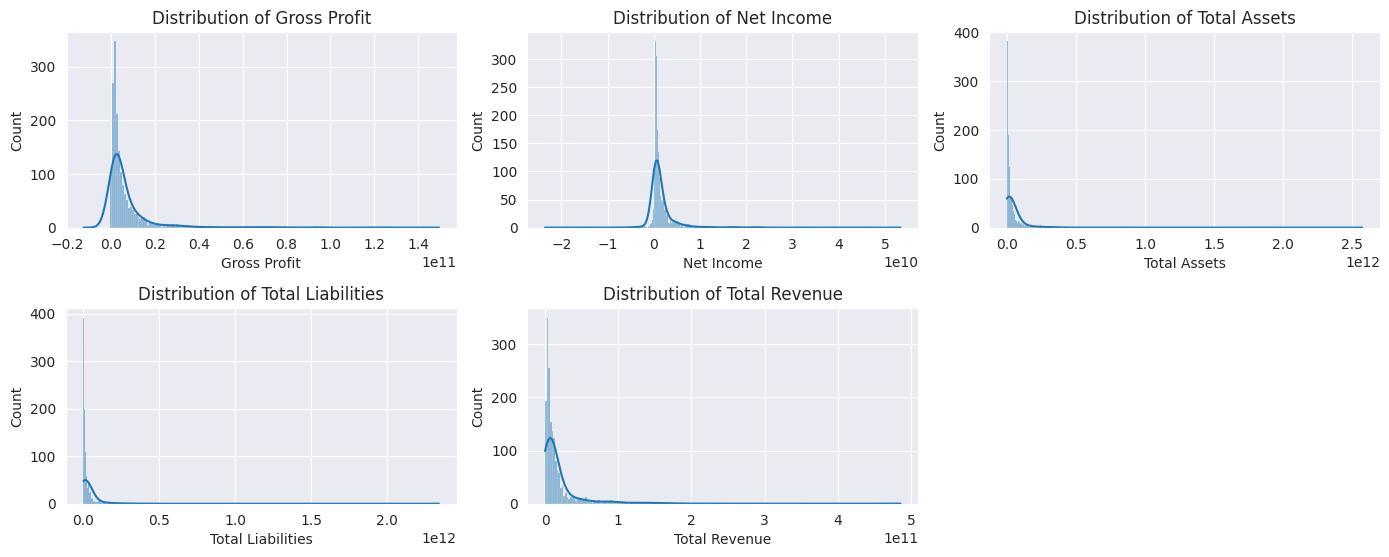

In [ ]:
# Select numerical variables for analysis
numerical_vars = [ 'Gross Profit', 'Net Income', 'Total Assets', 'Total Liabilities', 'Total Revenue']

# Calculate basic statistics
basic_stats = df[numerical_vars].describe()
print("Basic Statistics:")
basic_stats

# Visualize distributions using histograms
plt.figure(figsize=(14, 8))
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[var], kde=True)
    plt.title(f"Distribution of {var}")
plt.tight_layout()
plt.show()

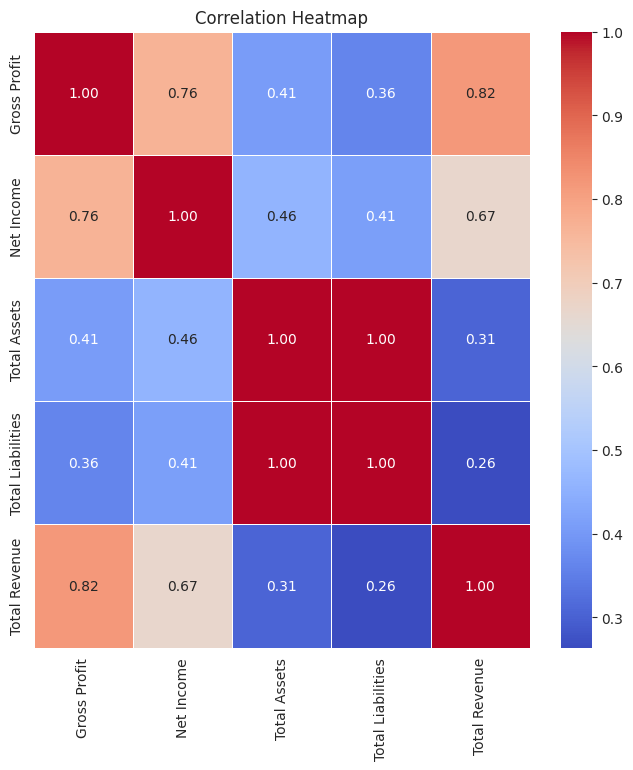

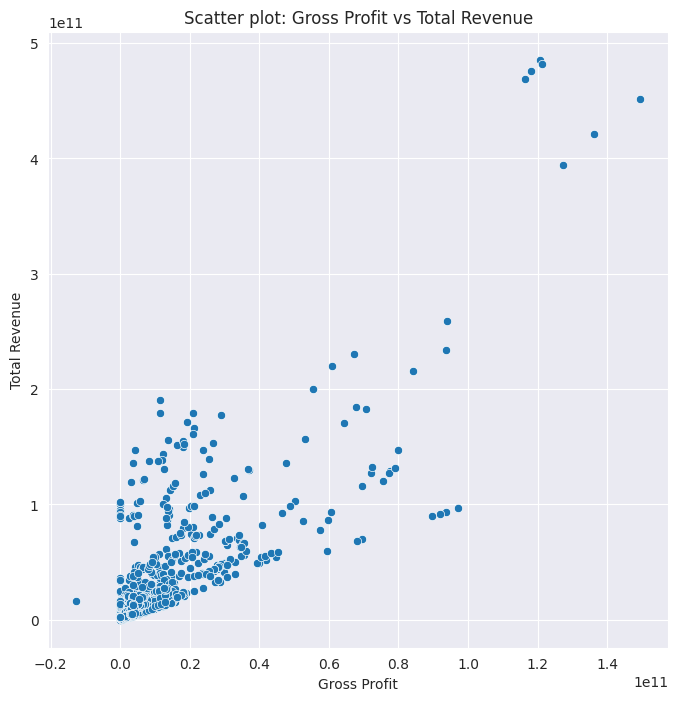

In [ ]:
selected_columns = ['Gross Profit', 'Net Income', 'Total Assets', 'Total Liabilities', 'Total Revenue']
df_selected = df[selected_columns]
# Calculate correlation matrix
correlation_matrix = df_selected.corr()

# Plotting correlation heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Scatter plot between 'Gross Profit' and 'Net Income'
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_selected, x='Gross Profit', y='Total Revenue')
plt.title('Scatter plot: Gross Profit vs Total Revenue')
plt.xlabel('Gross Profit')
plt.ylabel('Total Revenue')
plt.show()

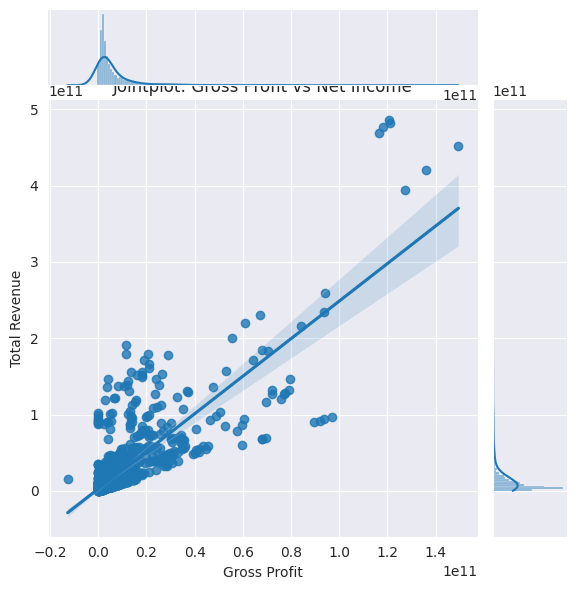

In [ ]:
# Jointplot - Gross Profit vs Net Income
sns.jointplot(data=df_selected, x='Gross Profit', y='Total Revenue', kind='reg')
plt.title('Jointplot: Gross Profit vs Net Income')
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


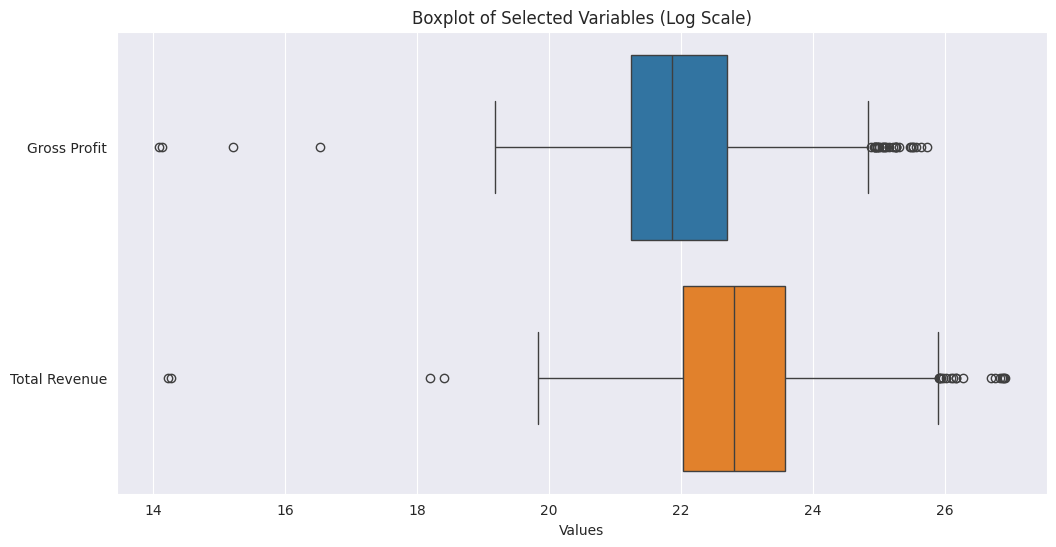

In [ ]:
# prompt: generate a box plot for the df_selected
selected_columns = ['Gross Profit', 'Total Revenue']
df_selected = df[selected_columns]
df_selected_log = df_selected.apply(lambda x: np.log(x) if np.issubdtype(x.dtype, np.number) else x)

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_selected_log, orient='h')
plt.title('Boxplot of Selected Variables (Log Scale)')
plt.xlabel('Values')
plt.show()

#Linear regression

In [ ]:
X=df[['Net Income']]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Selecting the features and target variable
y = df['Gross Profit']
X_assets = df[['Total Assets']]
X_profit = df[['Total Revenue']]

# Splitting the dataset into training and testing sets
X_assets_train, X_assets_test, y_train, y_test = train_test_split(X_assets, y, test_size=0.2, random_state=42)
X_profit_train, X_profit_test, y_train, y_test = train_test_split(X_profit, y, test_size=0.2, random_state=42)

# Creating and training the linear regression models
model_assets = LinearRegression()
model_profit = LinearRegression()

model_assets.fit(X_assets_train, y_train)
model_profit.fit(X_profit_train, y_train)

# Making predictions
y_pred_assets = model_assets.predict(X_assets_test)
y_pred_profit = model_profit.predict(X_profit_test)

# Evaluating the models
mse_assets = mean_squared_error(y_test, y_pred_assets)
mse_profit = mean_squared_error(y_test, y_pred_profit)

print("Mean Squared Error (Assets):", mse_assets)
print("Mean Squared Error (Net Income):", mse_profit)


Mean Squared Error (Assets): 1.67544588604579e+20
Mean Squared Error (Net Income): 6.999843801373259e+19


In [ ]:
X=df[['Total Revenue']]

In [ ]:
X.shape

(1781, 1)

In [ ]:
## Independent and dependent features
X=df[['Total Liabilities']] ### independent features should be data frame or 2 dimesnionalarray
y=df['Total Revenue'] ## this variiable can be in series or 1d array

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
## Standardization
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [ ]:
X_train.shape

(1335, 1)

In [ ]:
X_test=scaler.transform(X_test)

In [ ]:
X_test.shape

(446, 1)

In [ ]:
## Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [ ]:
regression=LinearRegression(n_jobs=-1)

In [ ]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [ ]:

print("Coefficient or slope:",regression.coef_)
print("Intercept:",regression.intercept_)

Coefficient or slope: [1.074712e+10]
Intercept: 20616386872.659176


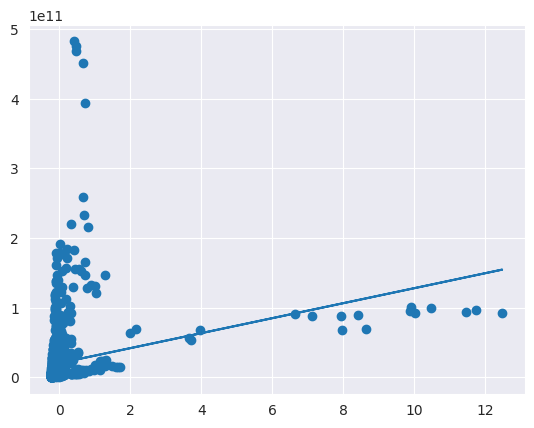

In [ ]:
## plot Training data plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

**prediction of test data**
* predicted  output= intercept +coef_(Weights)
* y_pred_test =156.470 + 17.29(X_test)

In [ ]:
## Prediction for test data
y_pred=regression.predict(X_test)

In [ ]:
y_pred

array([2.41404958e+10, 1.81166033e+10, 1.86007200e+10, 1.82685255e+10,
       1.84738201e+10, 1.84690705e+10, 2.00636470e+10, 1.87062150e+10,
       1.88285521e+10, 2.08903642e+10, 1.82675528e+10, 1.98974046e+10,
       1.88140274e+10, 2.12187641e+10, 1.93401892e+10, 1.84882146e+10,
       2.32440245e+10, 1.83447414e+10, 1.86293746e+10, 1.85608964e+10,
       1.91356550e+10, 2.03001290e+10, 1.90942112e+10, 1.83412173e+10,
       2.18163715e+10, 1.81363972e+10, 1.82088714e+10, 1.85106118e+10,
       1.87230425e+10, 2.01934655e+10, 1.84823599e+10, 1.89444952e+10,
       1.82170157e+10, 1.88977090e+10, 2.29245567e+10, 1.89322883e+10,
       1.92038914e+10, 1.96429720e+10, 2.09265546e+10, 1.84338478e+10,
       1.82392428e+10, 2.95604172e+10, 1.91235137e+10, 1.84807834e+10,
       1.89577383e+10, 2.10650996e+10, 1.92383891e+10, 1.81940571e+10,
       1.83552870e+10, 1.82257462e+10, 1.86886452e+10, 1.87165468e+10,
       1.85171595e+10, 1.87215749e+10, 1.82141831e+10, 1.99038722e+10,
      

In [ ]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

1.5707810593690744e+21
18614622924.51235
39633080366.898994


**R square**

* Formula

* R^2 = 1 - SSR/SST

* R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

* R-squared is a statistical measure that indicates how much of the variation of a dependent variable is explained by an independent variable in a regression model

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
score=r2_score(y_test,y_pred)
print(score)

0.07036160292465443


In [ ]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.06826782275106125

In [ ]:
## OLS Linear Regression
import statsmodels.api as sm

In [ ]:
model=sm.OLS(y_train,X_train).fit()

In [ ]:
prediction=model.predict(X_test)
print(prediction)

[ 3.52410896e+09 -2.49978353e+09 -2.01566685e+09 -2.34786136e+09
 -2.14256675e+09 -2.14731639e+09 -5.52739879e+08 -1.91017183e+09
 -1.78783479e+09  2.73977331e+08 -2.34883406e+09 -7.18982244e+08
 -1.80235945e+09  6.02377273e+08 -1.27619770e+09 -2.12817231e+09
  2.62763767e+09 -2.27164548e+09 -1.98701223e+09 -2.05549048e+09
 -1.48073184e+09 -3.16257839e+08 -1.52217569e+09 -2.27516955e+09
  1.19998466e+09 -2.47998972e+09 -2.40751552e+09 -2.10577512e+09
 -1.89334440e+09 -4.22921403e+08 -2.13402698e+09 -1.67189165e+09
 -2.39937122e+09 -1.71867790e+09  2.30816981e+09 -1.68409856e+09
 -1.41249542e+09 -9.73414841e+08  3.10167733e+08 -2.18253905e+09
 -2.37714406e+09  8.94403033e+09 -1.49287314e+09 -2.13560348e+09
 -1.65864853e+09  4.48712766e+08 -1.37799780e+09 -2.42232977e+09
 -2.26109983e+09 -2.39064069e+09 -1.92774169e+09 -1.89984005e+09
 -2.09922740e+09 -1.89481198e+09 -2.40220382e+09 -7.12514669e+08
 -2.37057165e+09 -2.43817690e+09 -2.14015600e+09 -2.25187239e+09
 -2.33301582e+09 -5.47370

In [ ]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:          Total Revenue   R-squared (uncentered):                   0.055
Model:                            OLS   Adj. R-squared (uncentered):              0.054
Method:                 Least Squares   F-statistic:                              77.78
Date:                Sat, 09 Mar 2024   Prob (F-statistic):                    3.53e-18
Time:                        03:59:48   Log-Likelihood:                         -34627.
No. Observations:                1335   AIC:                                  6.926e+04
Df Residuals:                    1334   BIC:                                  6.926e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------